# Correlation

Alex Koiter

## Load Libraries

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

## Read in data

In [ ]:
conc <- read_csv(here::here("./notebooks/P_concentration.csv"))

Rows: 1141 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): sample_type, timing, plot, location, treatment
dbl (3): site, ak_content, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 576 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): sample_type, timing, plot, location, treatment
dbl (3): site, dryweight, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Merge data

In [ ]:
veg_data <- mass_data %>%
  right_join(conc) %>%
  rename(conc = ak_content) %>% # mg/kg
  mutate(p_total = conc * dryweight/1000 /0.25) %>% # mg/m2
  filter(timing == "Before",
         sample_type != "Soil")

Joining with `by = join_by(sample_type, site, timing, plot, location, year,
treatment)`

In [ ]:
soil_data <- conc %>%
  filter(timing == "Before",
         sample_type == "Soil") %>%
  rename(soil_conc = ak_content) %>%
  select(site, timing, plot,  location, year, treatment, soil_conc) 

## Join
corr_data <- soil_data %>%
  right_join(veg_data) 

Joining with `by = join_by(site, timing, plot, location, year, treatment)`

# A tibble: 3 × 2
  sample_type     corr
  <chr>          <dbl>
1 Biomass      0.00817
2 Litter      -0.0687 
3 Organic      0.404  


    Pearson's product-moment correlation

data:  conc and soil_conc
t = 0.096713, df = 140, p-value = 0.9231
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1567649  0.1726682
sample estimates:
        cor 
0.008173451 


    Pearson's product-moment correlation

data:  conc and soil_conc
t = -0.78824, df = 131, p-value = 0.432
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2361709  0.1027219
sample estimates:
        cor 
-0.06870628 


    Pearson's product-moment correlation

data:  conc and soil_conc
t = 5.2636, df = 142, p-value = 5.108e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2574957 0.5324382
sample estimates:
      cor 
0.4040529 


    Pearson's product-moment correlation

data:  dryweight and soil_conc
t = -1.392, df = 142, p-value = 0.1661
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.27439578  0.04846811
sample estimates:
       cor 
-0.1160277 


    Pearson's product-moment correlation

data:  dryweight and soil_conc
t = 0.11047, df = 131, p-value = 0.9122
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1608399  0.1795829
sample estimates:
        cor 
0.009651147 

# A tibble: 3 × 11
   site timing plot  location  year treatment  soil_conc sample_type dryweight
  <dbl> <chr>  <chr> <chr>    <dbl> <chr>          <dbl> <chr>           <dbl>
1     1 Before a     Upper     2020 High Graze      4.86 Biomass          75.3
2     1 Before a     Upper     2020 High Graze      4.86 Litter           47.3
3     1 Before a     Upper     2020 High Graze      4.86 Organic          NA  
# ℹ 2 more variables: conc <dbl>, p_total <dbl>

(`geom_point()`).

(`geom_point()`).
Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).

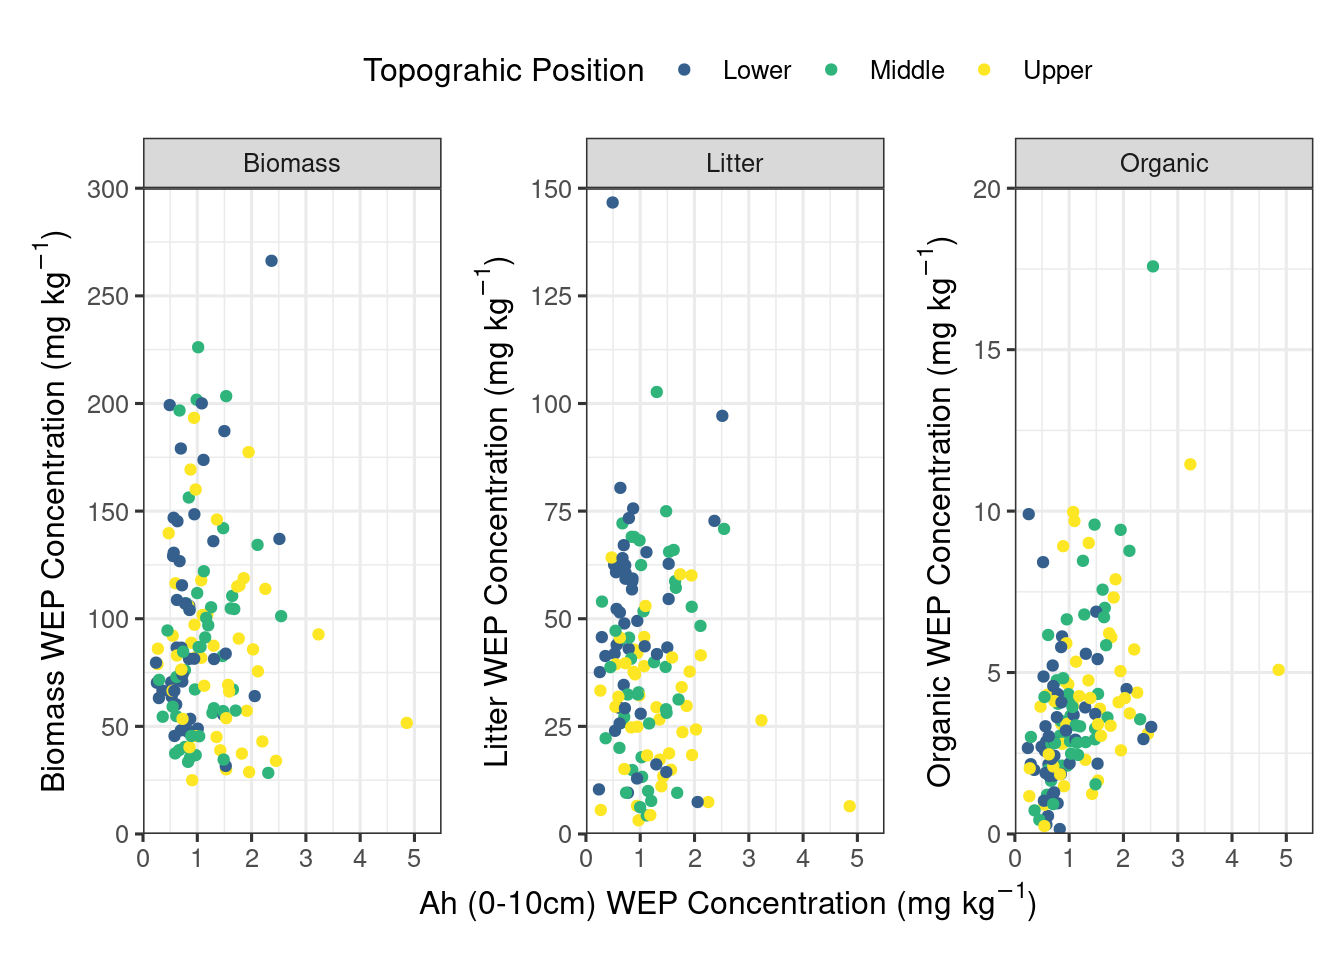

In [ ]:
p1 <- ggplot(data = filter(corr_data, sample_type == "Biomass"), aes(x = soil_conc, y = conc, colour = location,)) +
  geom_point() +
  theme_bw(base_size = 12) +
  labs(colour = "Topograhic Position", y = expression(paste("Biomass WEP Concentration (", mg~kg^{-1}, ")")), x = bquote('Ah (0-10cm) WEP Concentration ('*mg~kg^{-1}*')')) +
  scale_y_continuous(limits = c(0,300), breaks = seq(0,300,50), expand = c(0,0)) +
  scale_x_continuous(limits = c(0,5.5), expand = c(0,0)) +
  scale_colour_manual(values = c("#35608DFF", "#2FB47CFF", "#FDE725FF")) +
  facet_wrap(~sample_type, scales = "free")

p2 <- ggplot(data = filter(corr_data, sample_type == "Litter"), aes(x = soil_conc, y = conc, colour = location,)) +
  geom_point() +
  theme_bw(base_size = 12) +
  labs(colour = "Topograhic Position", y = expression(paste("Litter WEP Concentration (", mg~kg^{-1}, ")")), x = bquote('Ah (0-10cm) WEP Concentration ('*mg~kg^{-1}*')')) +
  scale_y_continuous(limits = c(0,150), breaks = seq(0,150,25), expand = c(0,0)) +
  scale_x_continuous(limits = c(0,5.5), expand = c(0,0)) +
  scale_colour_manual(values = c("#35608DFF", "#2FB47CFF", "#FDE725FF")) +
  facet_wrap(~sample_type, scales = "free")

p3 <- ggplot(data = filter(corr_data, sample_type == "Organic"), aes(x = soil_conc, y = conc, colour = location,)) +
  geom_point() +
  theme_bw(base_size = 12) +
  labs(colour = "Topograhic Position", y = expression(paste("Organic WEP Concentration (", mg~kg^{-1}, ")")), x = bquote('Ah (0-10cm) WEP Concentration ('*mg~kg^{-1}*')')) +
  scale_y_continuous(limits = c(0,20), breaks = seq(0,20,5), expand = c(0,0)) +
  scale_x_continuous(limits = c(0,5.5), expand = c(0,0)) +
  scale_colour_manual(values = c("#35608DFF", "#2FB47CFF", "#FDE725FF")) +
  facet_wrap(~sample_type, scales = "free")

p1 + p2 + p3 + plot_layout(axis_titles = "collect", guides = 'collect') & theme(legend.position = "top")

(`geom_point()`).
Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).

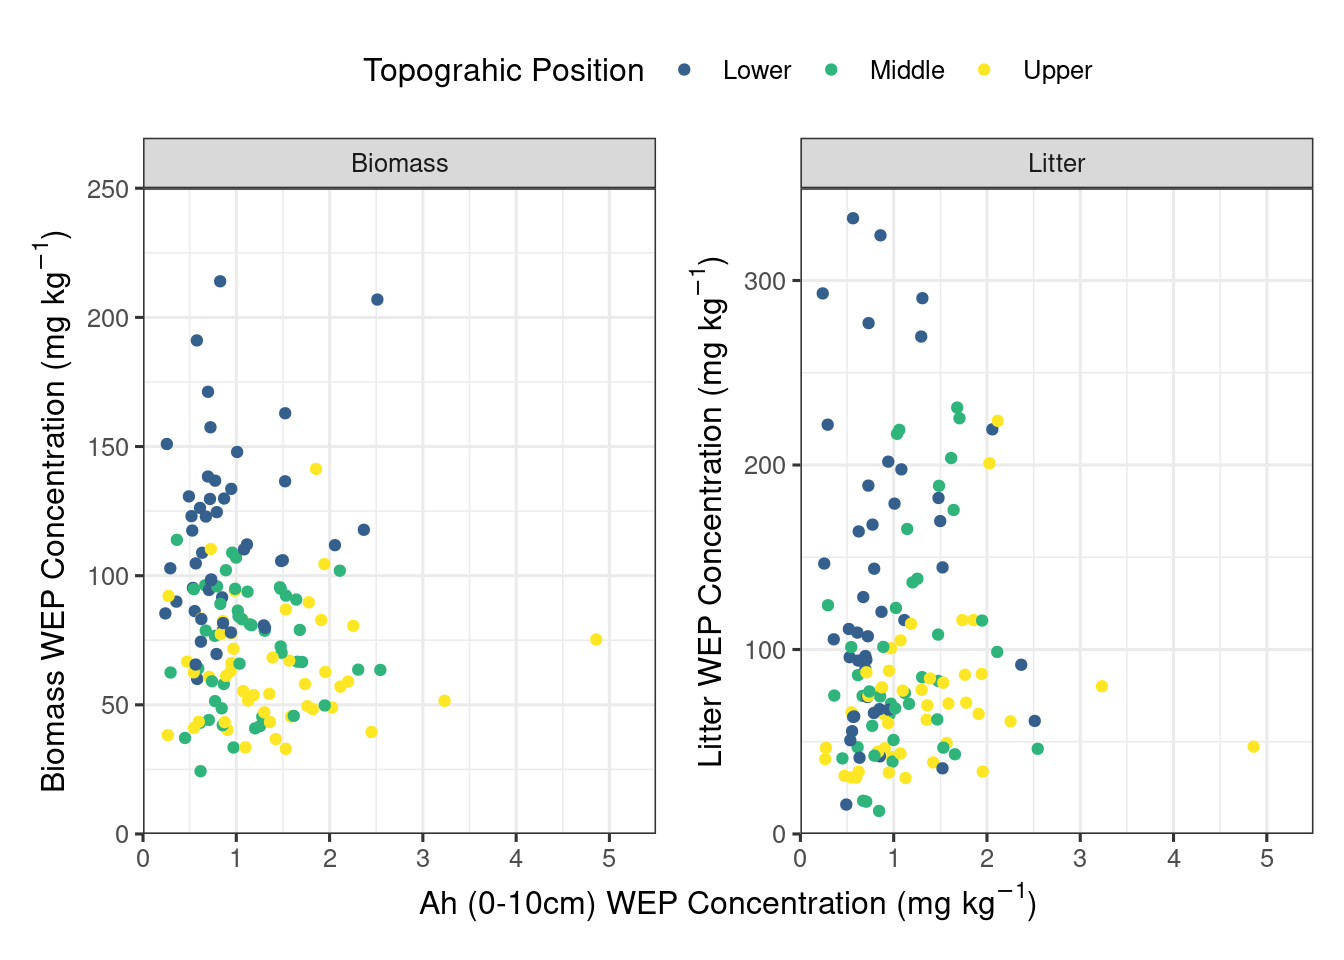

In [ ]:
p4 <- ggplot(data = filter(corr_data, sample_type == "Biomass"), aes(x = soil_conc, y = dryweight, colour = location,)) +
  geom_point() +
  theme_bw(base_size = 12) +
  labs(colour = "Topograhic Position", y = expression(paste("Biomass WEP Concentration (", mg~kg^{-1}, ")")), x = bquote('Ah (0-10cm) WEP Concentration ('*mg~kg^{-1}*')')) +
  scale_y_continuous(limits = c(0,250), breaks = seq(0,250,50), expand = c(0,0)) +
  scale_x_continuous(limits = c(0,5.5), expand = c(0,0)) +
  scale_colour_manual(values = c("#35608DFF", "#2FB47CFF", "#FDE725FF")) +
  facet_wrap(~sample_type, scales = "free")

p5 <- ggplot(data = filter(corr_data, sample_type == "Litter"), aes(x = soil_conc, y = dryweight, colour = location,)) +
  geom_point() +
  theme_bw(base_size = 12) +
  labs(colour = "Topograhic Position", y = expression(paste("Litter WEP Concentration (", mg~kg^{-1}, ")")), x = bquote('Ah (0-10cm) WEP Concentration ('*mg~kg^{-1}*')')) +
  scale_y_continuous(limits = c(0,350), breaks = seq(0,350,100), expand = c(0,0)) +
  scale_x_continuous(limits = c(0,5.5), expand = c(0,0)) +
  scale_colour_manual(values = c("#35608DFF", "#2FB47CFF", "#FDE725FF")) +
  facet_wrap(~sample_type, scales = "free")

p6 <- p4 + p5 + plot_layout(axis_titles = "collect", guides = 'collect') & theme(legend.position = "top")
p6

Joining with `by = join_by(sample_type, site, timing, plot, location, year,
treatment)`
`summarise()` has grouped output by 'year', 'treatment', 'location'. You can
override using the `.groups` argument.

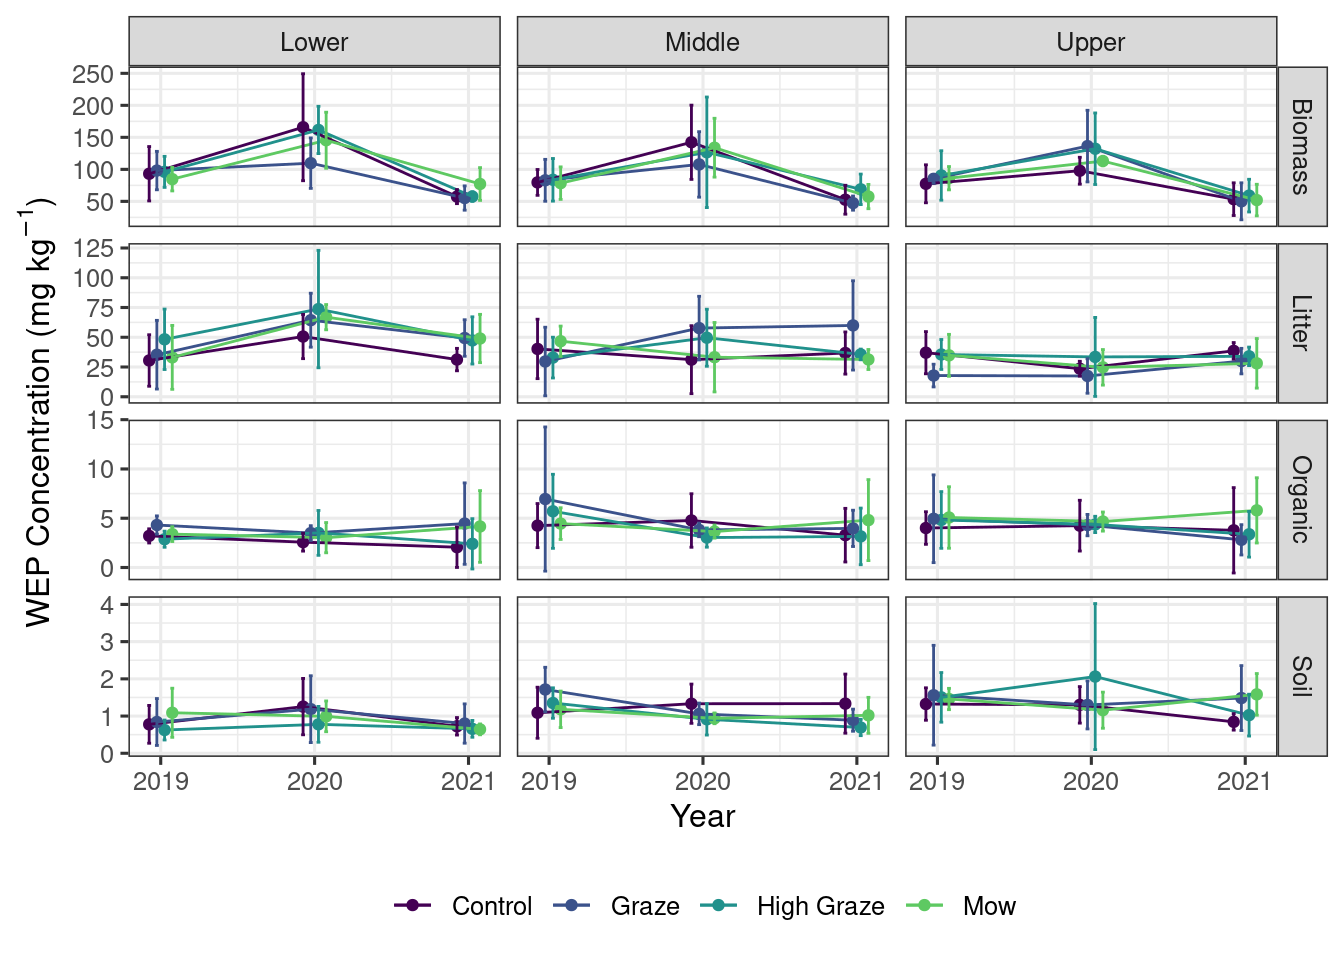

In [ ]:
veg_data2 <- mass_data %>%
  right_join(conc) %>%
  rename(conc = ak_content) %>% # mg/kg
  mutate(p_total = conc * dryweight/1000 /0.25) %>% # mg/m2
  filter(timing == "Before") %>%
  group_by(year, treatment, location, sample_type) %>%
  summarise(mean_total = mean(p_total, na.rm = T),
            sd_total = sd(p_total, na.rm = T),
            mean_conc = mean(conc, na.rm = T),
            sd_conc = sd(conc, na.rm = T)) %>%
  ungroup() %>%
  mutate(treatment = fct_recode(treatment, "Graze" = "Regular Graze")) %>%
  mutate(treatment = fct_relevel(treatment, "Control", "Graze", "High Graze", "Mow"))

Joining with `by = join_by(sample_type, site, timing, plot, location, year,
treatment)`

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 13 rows containing missing values

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 2 rows containing missing values

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 11 rows containing missing values

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 2 rows containing missing values

Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
Removed 11 rows containing missing values

(`stat_density()`).

(`stat_boxplot()`).

(`geom_point()`).

(`stat_density()`).

(`stat_boxplot()`).

(`geom_point()`).

(`geom_point()`).

(`geom_point()`).

(`geom_point()`).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

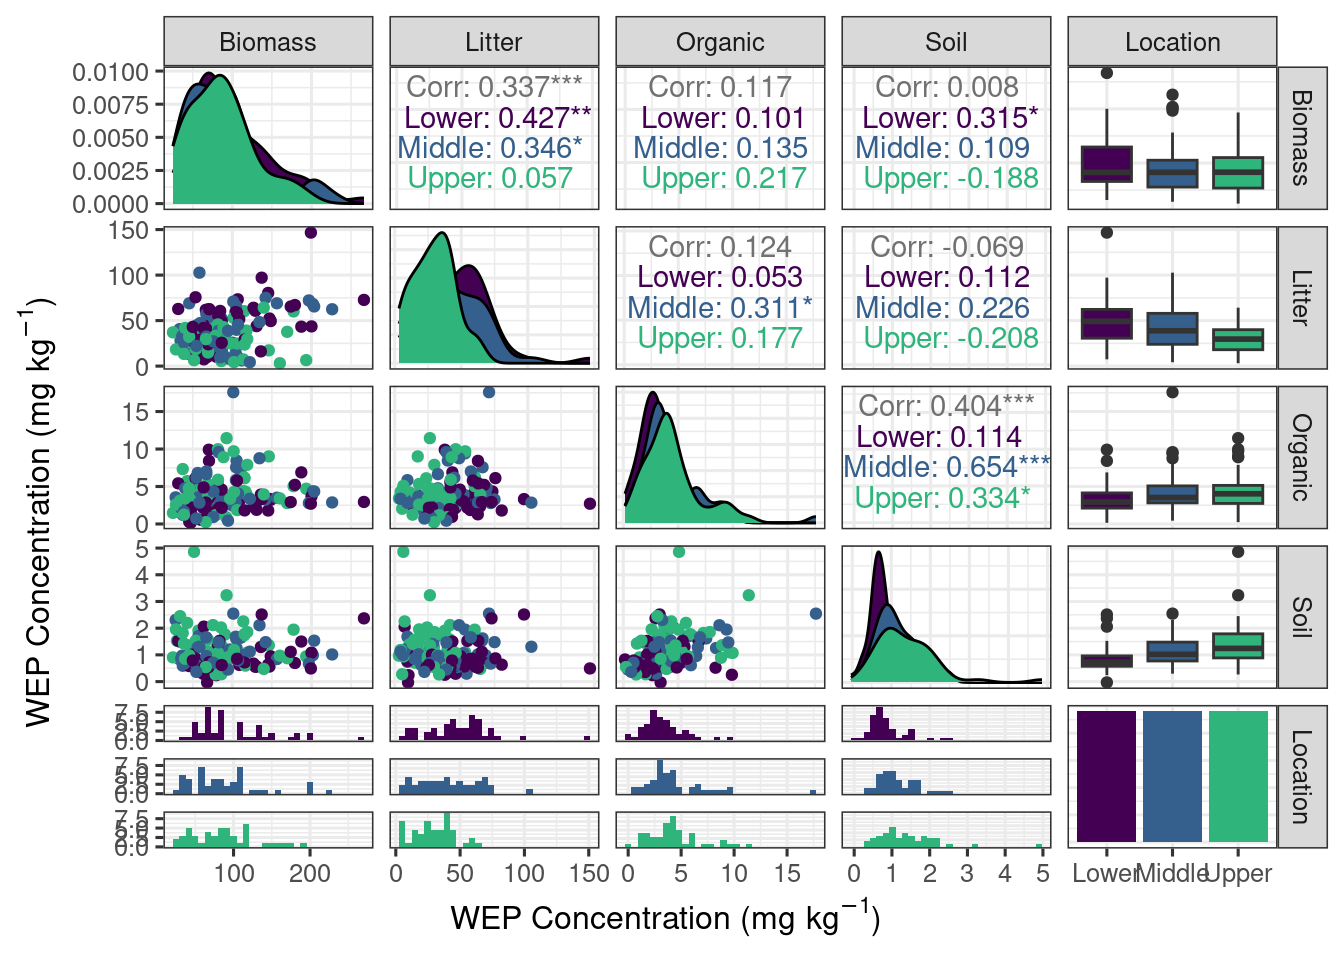

In [ ]:
p_data3 <- mass_data %>%
  right_join(conc) %>%
  rename(conc = ak_content) %>% # mg/kg
  mutate(p_total = conc * dryweight/1000 /0.25) %>% # mg/m2
  filter(timing == "Before") %>%
  select(-p_total, - dryweight) %>%
  pivot_wider(names_from = sample_type, values_from = conc) %>%
  mutate(year = factor(year)) %>%
  rename("Location" = "location")